# Analyzing CIA Facebook Data Using SQLite and Python

# Overview of the Data

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
# the first 5 rows of the facts table in the database.
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


 # Summary Statistics

In [5]:
q_cal = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q_cal, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


# Exploring Outliers

In [9]:
q_min_pop = "SELECT * FROM facts WHERE population == (select min(population) from facts);"
q_max_pop = "SELECT * FROM facts WHERE population == (select max(population) from facts);"

pd.read_sql_query(q_min_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [10]:
pd.read_sql_query(q_max_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


* `population`が最小値(=0)をとっているのは、南極大陸であった。南極大陸は南極条約によりどの国も領有権を持たない大陸であるから、国民が一人もいないのは当然である。
* 最大値をとったのは、`World`であり、すなわち約72億人という数値は世界人口を表していることがわかる。

どちらも国、地域の人口分析を行うのには不要なデータである。

# Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb831d5c898>,
      dtype=object)

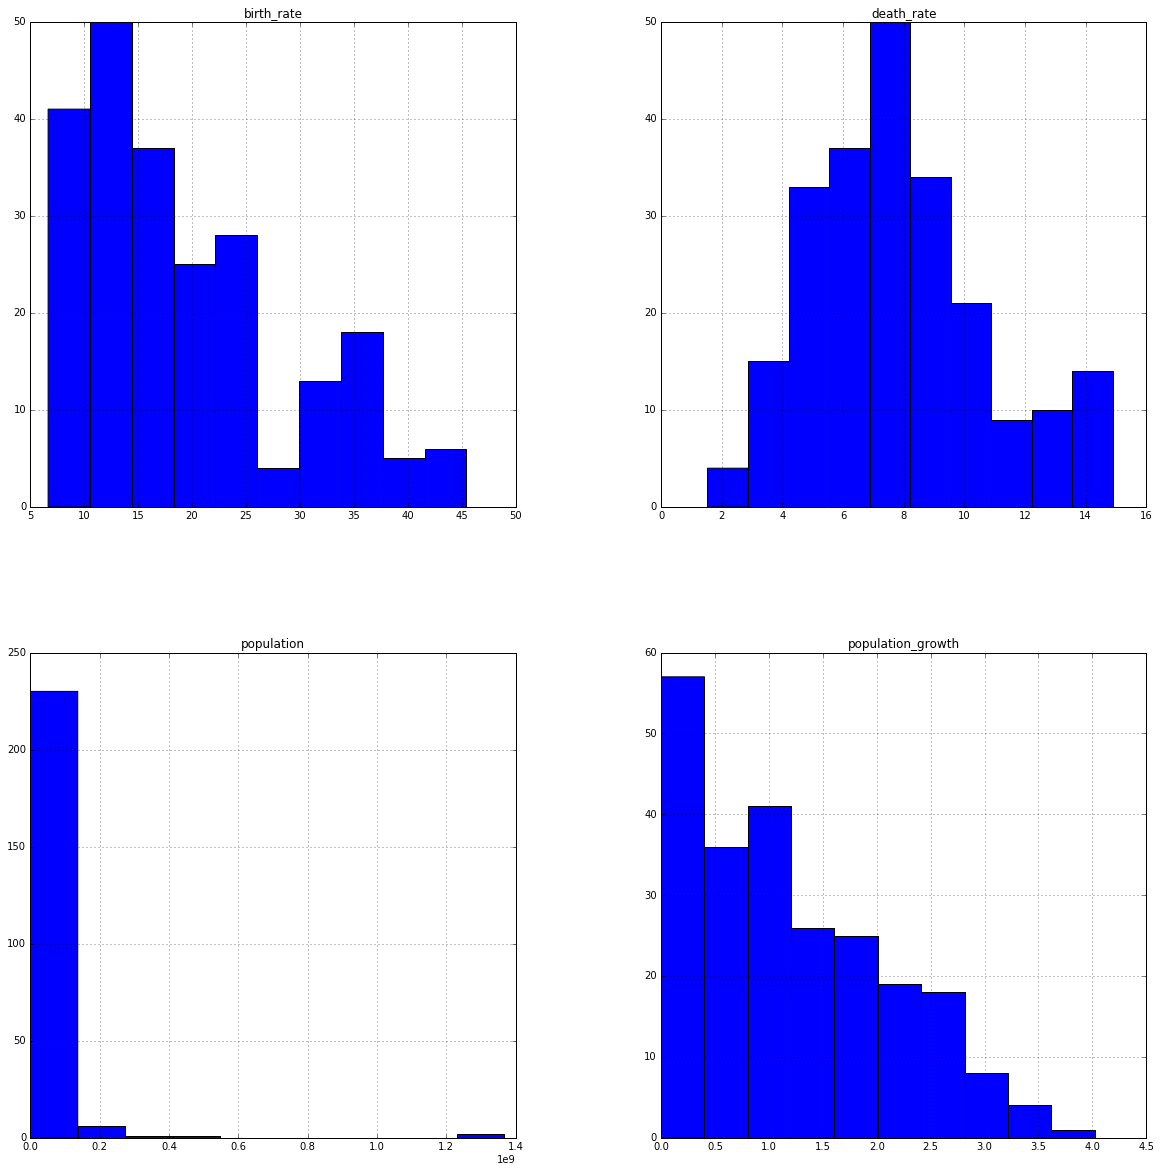

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1)

q3 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (select max(population) from facts) AND population != (select min(population) from facts);"

pd.read_sql_query(q3, conn).hist(ax=ax)

# Which Countries Have the Highest Population Density 

In [15]:
q4 = "SELECT name, ROUND(CAST(population as float) / CAST(area_land as float), 2) AS population_density FROM facts WHERE population != (select max(population) from facts) AND population != (select min(population) from facts) ORDER BY population_density DESC;"

pd.read_sql_query(q4, conn)

,name,population_density
0,Macau,21168.96
1,Monaco,15267.50
2,Singapore,8259.78
3,Hong Kong,6655.27
4,Gaza Strip,5191.82
5,Gibraltar,4876.33
6,Bahrain,1771.86
7,Maldives,1319.64
8,Malta,1310.02
9,Bermuda,1299.93


マカオの人口密度が最も大きい。上の結果は、[wikipedia](https://simple.wikipedia.org/wiki/List_of_countries_by_population_density)のデータと一致している。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb82f448f60>]],
      dtype=object)

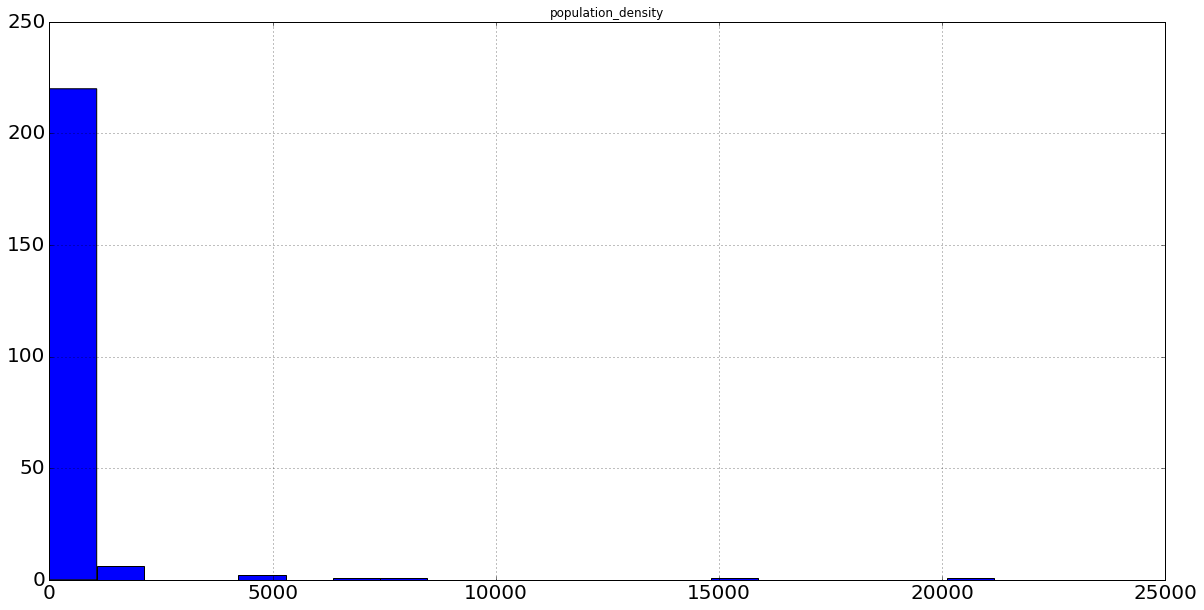

In [30]:
pd.read_sql_query(q4, conn).hist(xlabelsize=20, ylabelsize=20,
                                figsize=(20,10), bins=20)
plt.title("")